In [37]:
# Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Reading all datasets as pandas dataframes

hurricane_data = pd.read_csv('BRTK_SHIPS_2000to2019_IMERG_OK_Request_2023_FINAL.csv')
population_data = pd.read_csv('florida-population-2023-07-08.csv')
labor_data = pd.read_csv('labor-productivity-by-state-and-region.csv')

In [39]:
# Failed attempt to filter out all storms that did hit Florida

# all_florida_storms = hurricane_data[hurricane_data['LATITUDE'].all() <= 31.0 and hurricane_data['LONGITUDE'].all() >= -87.0]
# all_florida_storms.head()

In [40]:
# Successful attempt to filter out all storms that did hit Florida

all_florida_storm_indicies = []
for i in range(len(hurricane_data)):
    if(24.5 <= hurricane_data['LATITUDE'][i] <= 31.0 and -79.8 >= hurricane_data['LONGITUDE'][i] >= -87.0):
        all_florida_storm_indicies.append(i)

all_florida_storms = hurricane_data.iloc[all_florida_storm_indicies]
all_florida_storms = all_florida_storms.reset_index(drop=True)

In [41]:
# Listing out all the storms that hit Florida
# ALso listing all major hurricanes that hit Florida
# Also lists out years of major hurricanes that hit Florida

major_hurricane_indicies = []
print(all_florida_storms['STORM_NAME'].unique())
for i in range(len(all_florida_storms)):
    try:
        if(int(all_florida_storms['CAT'][i][1]) >= 3):
            print(all_florida_storms['STORM_NAME'][i])
            major_hurricane_indicies.append(i)
    except ValueError:
        pass
major_hurricanes = all_florida_storms.iloc[major_hurricane_indicies]

years = [int(str(date)[:4]) for date in major_hurricanes['DATE']]
print(years)

['GORDON' 'HELENE' 'BARRY' 'GABRIELLE' 'EDOUARD' 'HANNA' 'KYLE'
 'NOT_NAMED' 'ERIKA' 'HENRI' 'BONNIE' 'CHARLEY' 'FRANCES' 'IVAN' 'JEANNE'
 'ARLENE' 'DENNIS' 'KATRINA' 'RITA' 'TAMMY' 'WILMA' 'ALBERTO' 'ERNESTO'
 'FAY' 'GUSTAV' 'IKE' 'CLAUDETTE' 'BERYL' 'DEBBY' 'ISAAC' 'ANDREA' 'COLIN'
 'HERMINE' 'JULIA' 'MATTHEW' 'EMILY' 'IRMA' 'MICHAEL']
CHARLEY
IVAN
DENNIS
DENNIS
DENNIS
DENNIS
KATRINA
KATRINA
KATRINA
RITA
WILMA
GUSTAV
MATTHEW
MATTHEW
IRMA
IRMA
MICHAEL
MICHAEL
MICHAEL
MICHAEL
MICHAEL
[2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2008, 2016, 2016, 2017, 2017, 2018, 2018, 2018, 2018, 2018]


In [42]:
# Testing around with the population data because of my failure to use .loc

print(population_data.head())
print(population_data.iloc[:, 0])
print(population_data.iloc[:, 1])

      Date   Population   Annual Change
0  12/1/00       530000             NaN
1  12/1/01       544000            2.64
2  12/1/02       565000            3.86
3  12/1/03       587000            3.89
4  12/1/04       599000            2.04
0      12/1/00
1      12/1/01
2      12/1/02
3      12/1/03
4      12/1/04
        ...   
118    12/1/18
119    12/1/19
120    12/1/20
121    12/1/21
122    12/1/22
Name: Date, Length: 123, dtype: object
0        530000
1        544000
2        565000
3        587000
4        599000
         ...   
118    21254926
119    21492056
120    21589602
121    21828069
122    22244823
Name:  Population, Length: 123, dtype: int64


In [43]:
# Simplify how years are displayed in the population data
# Also filters out all data before 2000

for i in range(len(population_data)):
    population_data.iloc[i, 0] = population_data.iloc[i, 0][-2:]
    if(i < 100):
        pass
    else:
        population_data.iloc[i, 0] = '20' + population_data.iloc[i, 0]
population_data = population_data.iloc[100:, :]
population_data = population_data.reset_index(drop=True)


In [44]:
# Verification of population data contents

print(population_data)

    Date   Population   Annual Change
0   2000     16047515            6.20
1   2001     16356966            1.93
2   2002     16689370            2.03
3   2003     17004085            1.89
4   2004     17415318            2.42
5   2005     17842038            2.45
6   2006     18166990            1.82
7   2007     18367842            1.11
8   2008     18527305            0.87
9   2009     18652644            0.68
10  2010     18846143            1.04
11  2011     19055607            1.11
12  2012     19302016            1.29
13  2013     19551678            1.29
14  2014     19853880            1.55
15  2015     20219111            1.84
16  2016     20627237            2.02
17  2017     20977089            1.70
18  2018     21254926            1.32
19  2019     21492056            1.12
20  2020     21589602            0.45
21  2021     21828069            1.10
22  2022     22244823            1.91


/var/folders/94/g9q138r57c77g58pkrfmdwbm0000gp/T/ipykernel_7288/1837756395.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = population_data.iloc[:, 0], fontsize = 6)


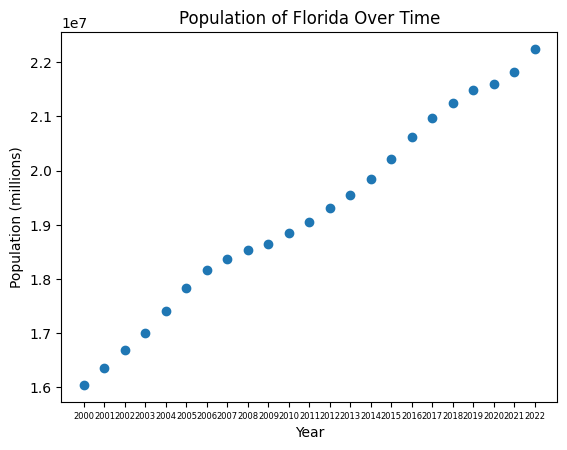

In [45]:
# Plotting population data over year
# Later, I will change colors of points of strong storms

fig, ax = plt.subplots()
plt.scatter(x = population_data.iloc[:, 0], y = population_data.iloc[:, 1])
start, end = ax.get_xlim()
# start, end = 0, 128
# ax.xaxis.set_ticks(np.arange(start, end, 10))
ax.set_xticklabels(labels = population_data.iloc[:, 0], fontsize = 6)
plt.title('Population of Florida Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
plt.show()

In [46]:
# Getting all the labor data for Florida only

florida_labor_data = labor_data[labor_data['Area'] == 'Florida']

In [47]:
# Selecting all of the data for actual number of labor hours

florida_labor_data = florida_labor_data.reset_index(drop=True)
working_hours = florida_labor_data[florida_labor_data['Units'] == 'Millions of hours']
working_hours = working_hours.reset_index(drop=True)
working_hours.head()

,Sector,Area,Basis,Measure,Units,Year,Value
0,Private nonfarm,Florida,All workers,Hours worked,Millions of hours,2007,"13,266.371"
1,Private nonfarm,Florida,All workers,Hours worked,Millions of hours,2008,"12,526.034"
2,Private nonfarm,Florida,All workers,Hours worked,Millions of hours,2009,"11,631.709"
3,Private nonfarm,Florida,All workers,Hours worked,Millions of hours,2010,"11,606.950"
4,Private nonfarm,Florida,All workers,Hours worked,Millions of hours,2011,"11,611.617"


In [48]:
# Changing all of the values in the 'Value' column to floats from strings

working_hours = working_hours[working_hours['Measure'] == 'Hours worked']
for i in range(len(working_hours.iloc[:, 6])):
    working_hours.iloc[i, 6] = working_hours.iloc[i, 6].replace(',', '')
working_hours.iloc[:, 6] = working_hours.iloc[:, 6].astype(float)

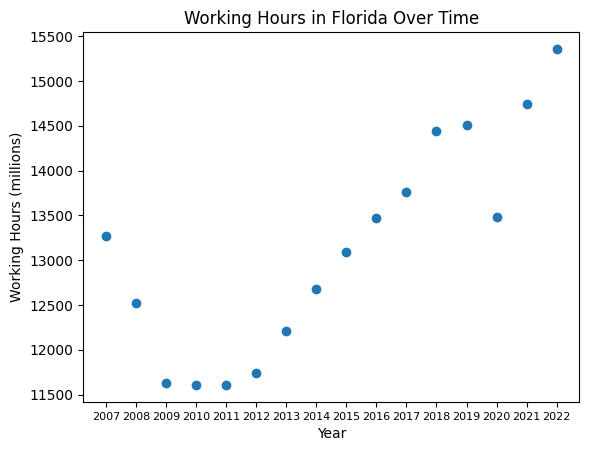

In [49]:
# Plot of working hours in Florida over time
# Later, I will change colors of points of strong storms

fig, ax = plt.subplots()
plt.scatter(x = working_hours.iloc[:, 5], y = working_hours.iloc[:, 6])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(2007, end, 1))
ax.xaxis.set_ticklabels(labels = working_hours.iloc[:, 5], fontsize = 8)
plt.title('Working Hours in Florida Over Time')
plt.xlabel('Year')
plt.ylabel('Working Hours (millions)')
plt.show()